## Observations and Insights 

Observations:
1. There is a positive correlation between mouse weight and average tumor volume. As mouse weight increases, so does the mean tumor volume. 

2. Capomulin has the second smallest standard deviation, mean, and median of tumor volume out of all the drugs, with Ramicane having the smallest in all these categories. 

2. Capomulin has the smallest interquartile range out of these 4 drugs: Capomulin, Ramicane, Infubinol, and Ceftamin.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID"])

# Display the data table for preview
data_complete
data_sorted = data_complete.sort_values(['Mouse ID', 'Timepoint'])

In [2]:
# Checking the number of mice.
num_of_mice = len(pd.unique(data_sorted['Mouse ID']))
num_of_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mice_dupes = data_sorted.duplicated(subset=['Mouse ID', 'Timepoint'],keep=False)
mice_dupes_df = pd.DataFrame(mice_dupes, columns = {'Dupe'})
mice_dupes_df = data_sorted.join(mice_dupes_df, how='outer')

mice_to_drop = mice_dupes_df[mice_dupes_df['Dupe'] == True].get('Mouse ID')
mice_to_drop = mice_to_drop.drop_duplicates()

mice_to_drop


107    g989
Name: Mouse ID, dtype: object

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dropped_mice_data = data_sorted

for i in mice_to_drop:
    dropped_mice_data = data_sorted[data_sorted['Mouse ID'] == i] 
    
dropped_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data_cleaned = data_sorted
for i in mice_to_drop:
    data_cleaned = data_cleaned[data_cleaned['Mouse ID'] != i]
    
data_cleaned


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
113,a203,0,45.000000,0,Infubinol,Female,20,23
389,a203,5,48.508468,0,Infubinol,Female,20,23
598,a203,10,51.852437,1,Infubinol,Female,20,23
758,a203,15,52.777870,1,Infubinol,Female,20,23
1018,a203,20,55.173336,1,Infubinol,Female,20,23
...,...,...,...,...,...,...,...,...
1143,z969,25,63.145652,2,Naftisol,Male,9,30
1407,z969,30,65.841013,3,Naftisol,Male,9,30
1529,z969,35,69.176246,4,Naftisol,Male,9,30
1730,z969,40,70.314904,4,Naftisol,Male,9,30


In [6]:
# Checking the number of mice in the clean DataFrame.
num_of_mice = len(pd.unique(data_cleaned['Mouse ID']))
num_of_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summary_df = pd.DataFrame(columns=['Mean','Median','Variance','Standard Deviation','SEM'])

summary_df['Mean'] = data_cleaned.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
summary_df['Median'] = data_cleaned.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
summary_df['Variance'] = data_cleaned.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
summary_df['Standard Deviation'] = data_cleaned.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
summary_df['SEM'] = data_cleaned.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
data_cleaned.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])



,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


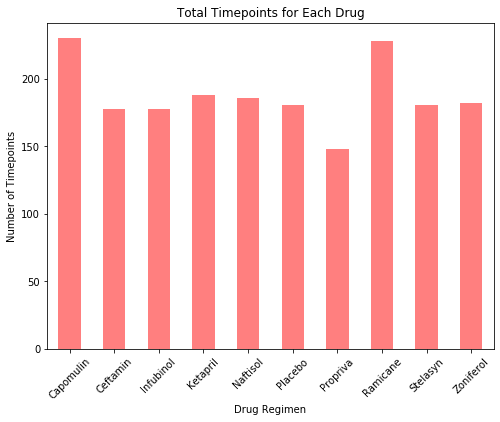

In [9]:
## Bar and Pie Charts

# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_and_time_df = data_cleaned[['Drug Regimen', 'Timepoint']]
drug_and_time_df = drug_and_time_df.groupby(['Drug Regimen']).count()

labels = list(drug_and_time_df.index.values)
plot = drug_and_time_df.plot(kind="bar", figsize=(8,6), alpha=0.5, color = 'red', align='center', legend=False)

plt.title("Total Timepoints for Each Drug")
plt.ylabel('Number of Timepoints')

plot.set_xticklabels(labels,rotation=45)

plt.show()


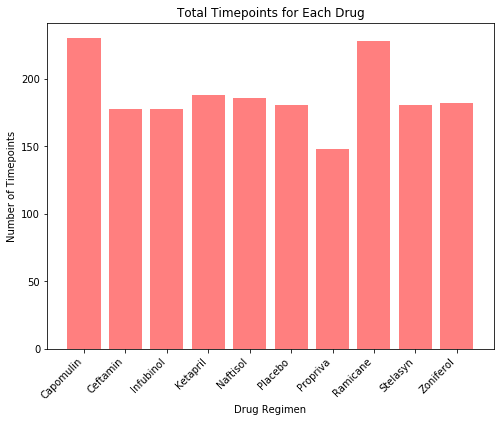

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoints_df = pd.DataFrame(data_cleaned.groupby('Drug Regimen')['Timepoint'].count())

y=timepoints_df['Timepoint']
x=list(summary_df.index.values)

plt.figure(figsize=(8,6))
plt.bar(x, y, color = 'r', alpha=0.5, align='center')

# formattting

plt.title('Total Timepoints for Each Drug')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.xticks(rotation= 45, ha='right')
plt.show()



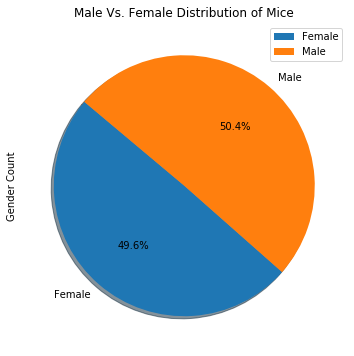

,Mouse ID
Sex,
Female,123
Male,125


In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# drug_and_time_df = data_cleaned[['Drug Regimen', 'Timepoint']]
# drug_and_time_df = drug_and_time_df.groupby(['Drug Regimen']).count()

genders_df = pd.DataFrame(data_cleaned.groupby(['Sex'])['Mouse ID'].nunique())

plot = genders_df.plot(kind="pie", y='Mouse ID', autopct="%1.1f%%", figsize=(8,6), title='Male Vs. Female Distribution of Mice', shadow=True, startangle=140)
plot.set_ylabel("Gender Count")

plt.show()

genders_df

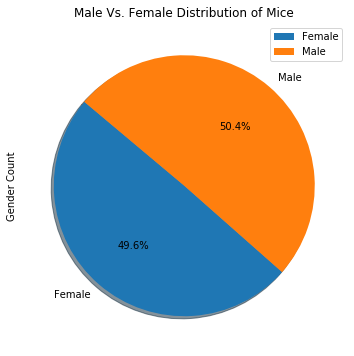

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

genders_df = pd.DataFrame(data_cleaned.groupby(['Sex'])['Mouse ID'].nunique())
labels = list(genders_df.index.values)

plt.figure(figsize=(8,6))
labels = list(genders_df.index.values)
x=genders_df['Mouse ID']
plt.pie(x, labels=labels, autopct="%1.1f%%", shadow=True, startangle=140)
plt.ylabel('Gender Count')
plt.legend(labels)
plt.title('Male Vs. Female Distribution of Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoints = data_cleaned.groupby(['Mouse ID'])['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_volume_df = pd.merge(greatest_timepoints, data_cleaned, how='left', on=['Mouse ID','Timepoint'])
final_volume_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = list()


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_tumor_vols = final_volume_df.loc[final_volume_df['Drug Regimen'] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_volume.append(drug_tumor_vols)
    
    # Determine outliers using upper and lower bounds
    quartiles = drug_tumor_vols.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq

    lower_bound = lowerq - (1.5 * iqr)

    upper_bound = upperq + (1.5 * iqr)


    outliers = drug_tumor_vols.loc[(drug_tumor_vols > upper_bound) | (drug_tumor_vols < lower_bound)]


    if len(outliers) > 0:
        print(f"{drug} outlier(s):")
        for o in outliers:
            print(f"{o}")
    else:
        print(f"{drug} has no outliers.")

  


Capomulin has no outliers.
Ramicane has no outliers.
Infubinol outlier(s):
36.321345799999996
Ceftamin has no outliers.


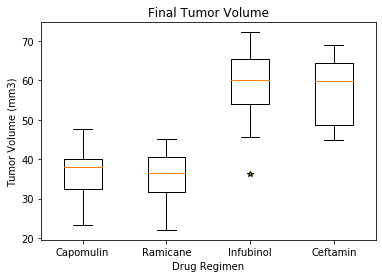

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
green_diamond = dict(markerfacecolor='y', marker='*')
plt.boxplot(tumor_volume,flierprops=green_diamond)

plt.title('Final Tumor Volume')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.xticks(ticks=[1,2,3,4], labels = drugs)
plt.show()

## Line and Scatter Plots

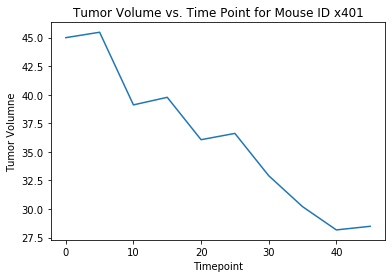

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_row = data_cleaned[data_cleaned['Drug Regimen'] == 'Capomulin'].sample()
mouse_id = mouse_row['Mouse ID'].values[0]
one_mouse_df = data_cleaned[data_cleaned['Mouse ID'] == mouse_id]

tumor_volumes = one_mouse_df['Tumor Volume (mm3)']
timepoints = one_mouse_df['Timepoint']


plt.plot(timepoints, tumor_volumes)
plt.ylabel('Tumor Volumne')
plt.xlabel('Timepoint')
plt.title(f'Tumor Volume vs. Time Point for Mouse ID {mouse_id}')
plt.show()



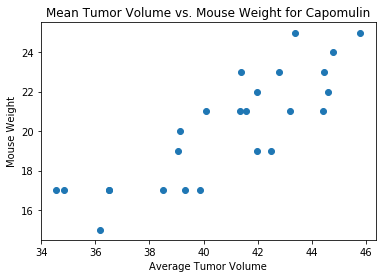

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_volume_df = data_cleaned[data_cleaned['Drug Regimen'] == 'Capomulin']

average_vols = Capomulin_volume_df.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean()
mouse_weights = Capomulin_volume_df.groupby(['Mouse ID'])['Weight (g)'].unique()
mouse_weights_list = []

for i in mouse_weights:
    mouse_weights_list.append(i[0])
    

plt.scatter(average_vols, mouse_weights)
plt.title('Mean Tumor Volume vs. Mouse Weight for Capomulin')
plt.xlabel('Average Tumor Volume')
plt.ylabel('Mouse Weight')

plt.show()


## Correlation and Regression

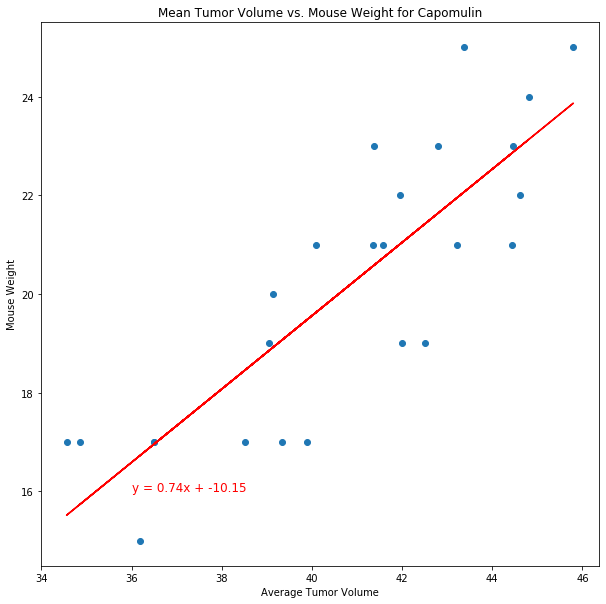

r-Value: 0.8419363424694718


In [18]:
# Calculate the correlation coefficient and linear regression model
# for mouse weight and average tumor volume for the Capomulin regimen


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(average_vols, mouse_weights_list)
regress_values = average_vols * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,10))

plt.scatter(average_vols, mouse_weights_list)
plt.title('Mean Tumor Volume vs. Mouse Weight for Capomulin')
plt.xlabel('Average Tumor Volume')
plt.ylabel('Mouse Weight')
plt.plot(average_vols,regress_values,"r-")
plt.annotate(line_eq, (36,16),fontsize=12,color="red")

plt.show()
print(f"r-Value: {rvalue}")
